### Step 1

In [1]:
# import librairies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="white", color_codes=True)

import warnings
warnings.filterwarnings("ignore")

In [2]:
# load data
df_titanic=pd.read_csv('train.csv')

In [3]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


There are 687 missing values in Cabin column, 177 missing values in Age column and 2 missing values in Embarked column.

In [5]:
# We drop all the columns which don't seem to be relevant for our analysis such as Name or Ticket
drop_titanic=df_titanic.drop(['PassengerId','Cabin','Ticket','Embarked','Name'],axis=1)

In [6]:
# We drop all the rows with age missing
df_titanic=drop_titanic.dropna()

In [7]:
df_titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [8]:
df_titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
std,0.491460,0.838250,14.526497,0.929783,0.853289,52.918930
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.125000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


### Step 2

In [9]:
# We use [Pandas.get_dummies] to convert categorical variables into dummy/ indicator variables.
# Here we convert 'Sex' into dummy variables
titanic=pd.get_dummies(data=df_titanic, columns=['Sex','Pclass'])

In [10]:
titanic.head()

,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,1,0,0
4,0,35.0,0,0,8.0500,0,1,0,0,1


### Step 3: Baseline model

In [11]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import metrics


X = titanic.drop(['Survived'],axis=1)
y = titanic['Survived']

# Split the dataset in train and test:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print ('Shape of training set : %i || Shape of test set : %i' % (X_train.shape[0],X_test.shape[0]))

Shape of training set : 571 || Shape of test set : 143


In [12]:
# Importing the model:
from sklearn.ensemble import RandomForestClassifier

# Initiating the model:
rf = RandomForestClassifier()

scores = cross_val_score(rf, X_train, y_train, scoring='accuracy',cv=10).mean()

print("The mean accuracy with 10 fold cross validation is %s" % round(scores*100,2))

The mean accuracy with 10 fold cross validation is 79.4


In [13]:
# We calculate the AUC score
from sklearn.metrics import roc_curve, roc_auc_score
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)

roc_value = roc_auc_score(y_test, rf_predictions)
roc_value

0.7726463607594937

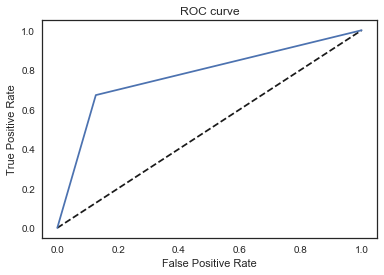

In [14]:
# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, rf_predictions)

plt.clf()
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

With an AUC of 0.77, there is 77% chance that our model will be able to distinguish between positive class and negative class.

### Step 4

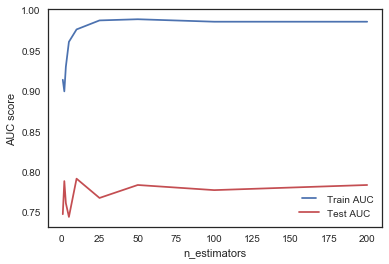

In [15]:
# train_results and test_results are lists of AUC scores for different number of estimators in train and test sets.
n_estimators = [1, 2, 3, 5, 10, 25, 50, 100, 200]
train_results = []
test_results = []
for i in n_estimators:
   rf = RandomForestClassifier(n_estimators=i)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   fpr, tpr, thresholds = roc_curve(y_train, train_pred)
   roc_auc = roc_auc_score(y_train, train_pred)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   fpr, tpr, thresholds = roc_curve(y_test, y_pred)
   roc_auc = roc_auc_score(y_test, y_pred)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label='Train AUC')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

From a n_estimator higher than 50, the test performance tends to decrease. 

### Step 5: Tuning max_depth

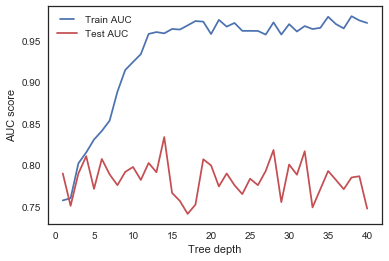

In [16]:
max_depths = np.linspace(1, 40, 40, endpoint=True)
train_results = []
test_results = []
for j in max_depths:
   rf = RandomForestClassifier(max_depth=j)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   fpr, tpr, thresholds = roc_curve(y_train, train_pred)
   roc_auc = roc_auc_score(y_train, train_pred)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   fpr, tpr, thresholds = roc_curve(y_test, y_pred)
   roc_auc = roc_auc_score(y_test, y_pred)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

There seems to be an overfitting in our model for high max depth values.

### Step 6: min_samples _split

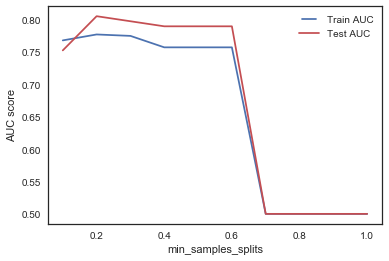

In [17]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for k in min_samples_splits:
   rf = RandomForestClassifier(min_samples_split=k)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   fpr, tpr, thresholds = roc_curve(y_train, train_pred)
   roc_auc = roc_auc_score(y_train, train_pred)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   fpr, tpr, thresholds = roc_curve(y_test, y_pred)
   roc_auc = roc_auc_score(y_test, y_pred)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min_samples_splits')
plt.show()

The model seems to be an underfitting model since for most of the splits the test AUC is higher than the train AUC.

### Step 7: min_samples_leaf

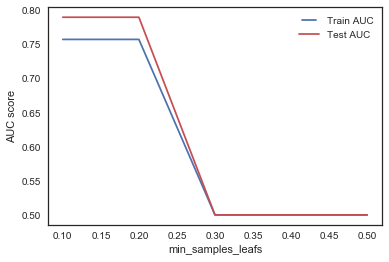

In [18]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for l in min_samples_leafs :
   rf = RandomForestClassifier(min_samples_leaf=l)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   fpr, tpr, thresholds = roc_curve(y_train, train_pred)
   roc_auc = roc_auc_score(y_train, train_pred)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   fpr, tpr, thresholds = roc_curve(y_test, y_pred)
   roc_auc = roc_auc_score(y_test, y_pred)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min_samples_leafs')
plt.show()

Like in the previous step, this model also seems to be underfitting.

### Step 8: max_features

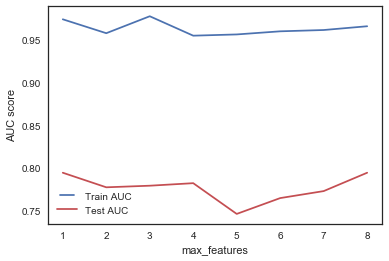

In [19]:
max_features = list(range(1,X_train.shape[1]))
train_results = []
test_results = []
for m in max_features :
   rf = RandomForestClassifier(max_features=m)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   fpr, tpr, thresholds = roc_curve(y_train, train_pred)
   roc_auc = roc_auc_score(y_train, train_pred)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   fpr, tpr, thresholds = roc_curve(y_test, y_pred)
   roc_auc = roc_auc_score(y_test, y_pred)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_features, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max_features')
plt.show()

The model looks like an overfitting case for some values of max_features.

### Step 9: 

To find the optimal parameters in one block of code, we can use GridSearchCV which does an exhaustive search over specified parameter values for an estimator.

In [20]:
from sklearn.model_selection import GridSearchCV
param_grid = {"n_estimators": [1, 10, 50],
              "max_depth": [3, 5],
              "min_samples_split": [0.2, 0.6],
              "min_samples_leaf": np.linspace(0.1, 0.5, 5, endpoint=True),
              "max_features": list(range(1,X_train.shape[1]))}

In [21]:
rf_grid = GridSearchCV(rf, param_grid,cv=10)
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=8, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [1, 10, 50], 'max_depth': [3, 5], 'min_samples_split': [0.2, 0.6], 'min_samples_leaf': array([0.1, 0.2, 0.3, 0.4, 0.5]), 'max_features': [1, 2, 3, 4, 5, 6, 7, 8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [22]:
# Print the tuned parameters and score
print("Tuned random forest Parameters: {}".format(rf_grid.best_params_))
print("Best score is {}".format(rf_grid.best_score_))

Tuned random forest Parameters: {'max_depth': 5, 'max_features': 3, 'min_samples_leaf': 0.1, 'min_samples_split': 0.6, 'n_estimators': 10}
Best score is 0.7933450087565674


The best score with the tuned random forest parameters is almost equal the mean accuracy score previously found which is 79.4.